## Loading Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [4]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/Data-Mining_Bread-Basket-Dataset/refs/heads/main/bread%20basket.csv')
df.head(5)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [5]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [85]:
#3 check missing values
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
date               0
hour               0
time               0
day                0
day_name           0
month              0
month_name         0
year               0
month_year         0
dtype: int64

4. The overview reveals a raw dataset that has no null values. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

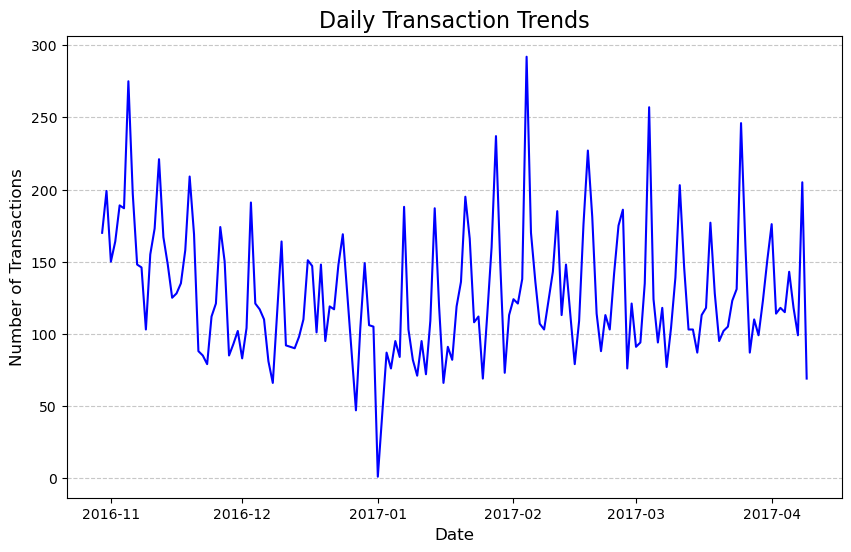

In [16]:
# 5
import seaborn as sns
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Extract date and hour
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

# Group by hour to see transaction counts
hourly_trends = df.groupby('hour').size().reset_index(name='transaction_count')

# Group by date to see daily transaction counts
daily_trends = df.groupby('date').size().reset_index(name='transaction_count')

# Plot daily trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='transaction_count', data=daily_trends,color='blue')
plt.title('Daily Transaction Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [20]:
# 6
df['hour'] = df['date_time'].dt.hour                
df['time'] = df['date_time'].dt.time                  
df['day'] = df['date_time'].dt.day                   
df['day_name'] = df['date_time'].dt.day_name()         
df['month'] = df['date_time'].dt.month                 
df['month_name'] = df['date_time'].dt.month_name()    
df['year'] = df['date_time'].dt.year                   

# Display enriched Dat
# show the modified data frame
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,time,day,day_name,month,month_name,year
17940,8521,Coffee,2017-03-21 11:18:00,morning,weekday,2017-03-21,11,11:18:00,21,Tuesday,3,March,2017
10484,5232,Scandinavian,2017-01-24 09:14:00,morning,weekday,2017-01-24,9,09:14:00,24,Tuesday,1,January,2017
13049,6401,Baguette,2017-02-11 12:55:00,afternoon,weekend,2017-02-11,12,12:55:00,11,Saturday,2,February,2017
19796,9361,Eggs,2017-04-04 11:43:00,morning,weekday,2017-04-04,11,11:43:00,4,Tuesday,4,April,2017
5776,2880,Bread,2016-12-09 15:26:00,afternoon,weekday,2016-12-09,15,15:26:00,9,Friday,12,December,2016



Alright, now I can easily create a visualization of monthly sales.

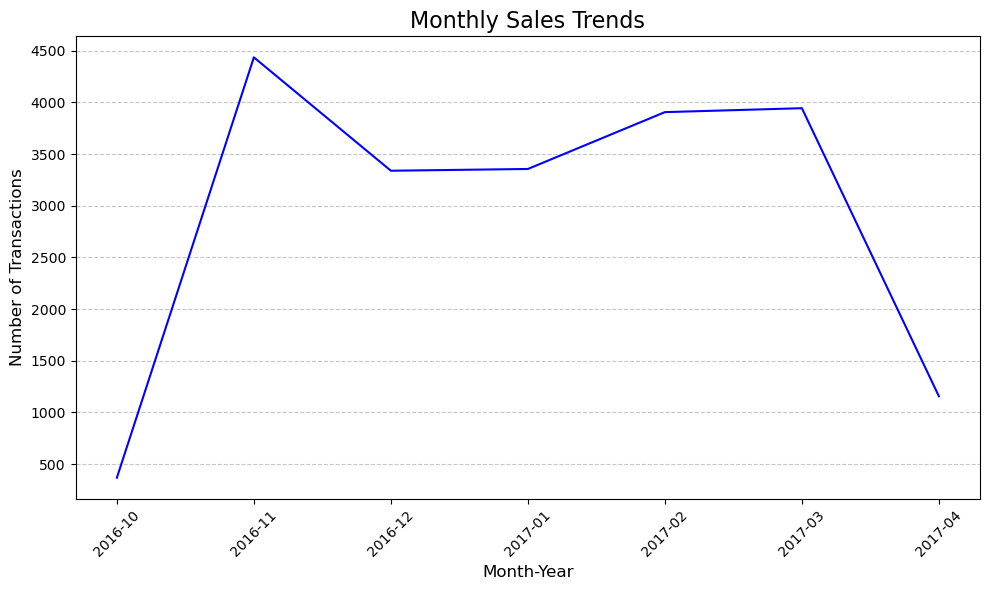

In [32]:
# 7
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['month_year'] = df['date_time'].dt.to_period('M')  # Format as 'YYYY-MM'

# Group data by month-year to count transactions
monthly_sales = df.groupby('month_year').size().reset_index(name='transaction_count')

# Convert period to string for better plotting
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)

# Plot monthly sales as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month_year', y='transaction_count', data=monthly_sales, color='blue')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: yes, it shows that january 2016 is the month with the most transaction but it dropped down a bit on december. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [34]:
#9
# Separate weekday and weekend names
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

# Display the results
print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [37]:
#10
pivot_table = df.pivot_table(
    index=df['date_time'].dt.month,  
    columns='day_name',           
    values='Transaction',           
    aggfunc='count',                
    fill_value=0                   
)

# Sort the columns from Monday to Sunday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table[day_order]  # Reorder the columns

# Rename the index to 'month' for clarity
pivot_table.index.name = 'month'

# Display the sorted pivot table
print(pivot_table)

day_name  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month                                                                   
1            329      474        322       399     489       807     536
2            474      429        419       456     599       879     650
3            379      433        459       557     674       883     559
4            118      115        143       118      99       381     183
10           199        0          0         0       0         0     170
11           469      599        576       591     639       879     683
12           356      342        402       525     624       776     314


11. Wow, it turns out the insight that can be gained from the table above is weekends sell a lot more than weekdays especially on saturday when most of people are on holiday


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

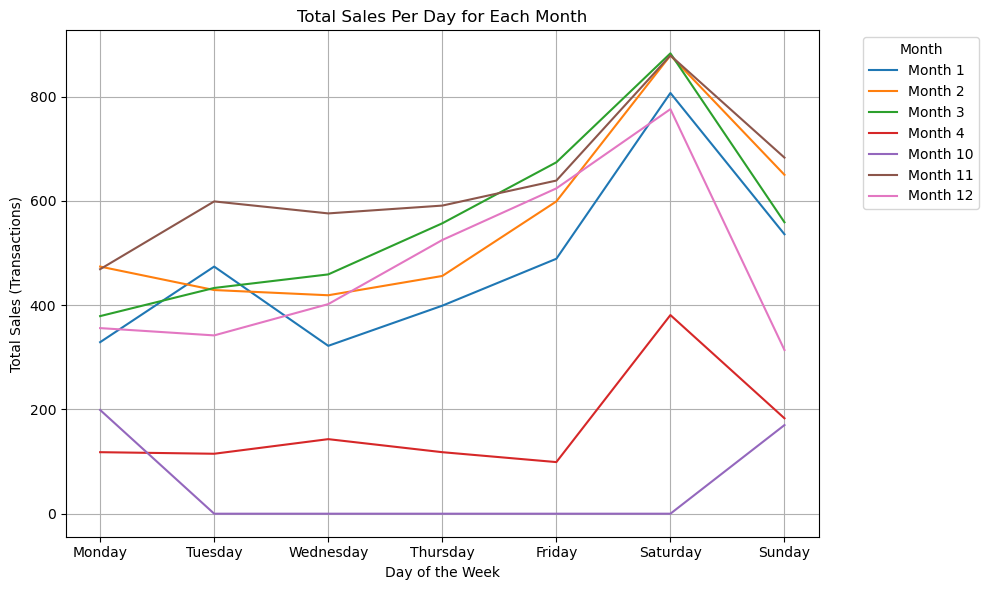

In [41]:
# 12
# Aggregate data by month and day to calculate total transactions for each day
agg_data = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Pivot the table to have months as rows and day names as columns
pivot_data = agg_data.pivot_table(
    index='month',  # Use month as the index
    columns='day_name', 
    values='total_transactions', 
    aggfunc='sum', 
    fill_value=0
)

# Sort columns from Monday to Sunday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_data = pivot_data[day_order]

# Plot the comparison of total sales per day for each month
plt.figure(figsize=(10, 6))
for month in pivot_data.index:
    plt.plot(pivot_data.columns, pivot_data.loc[month], label=f"Month {month}")

plt.title('Total Sales Per Day for Each Month')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Transactions)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that saturday sells more than other days espcially on november.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [50]:
# 14
unique_periods = df['period_day'].unique()

print(unique_periods, unique_periods.dtype)

['morning' 'afternoon' 'evening' 'night'] object


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [51]:
# 15
df['hour'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.hour

# Create arrays for each period of the day based on the 'period_day' column
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Display the unique hours for each period of the day
print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes morning doesn't have 2 until 6 that's probably because it's not working time anymore


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

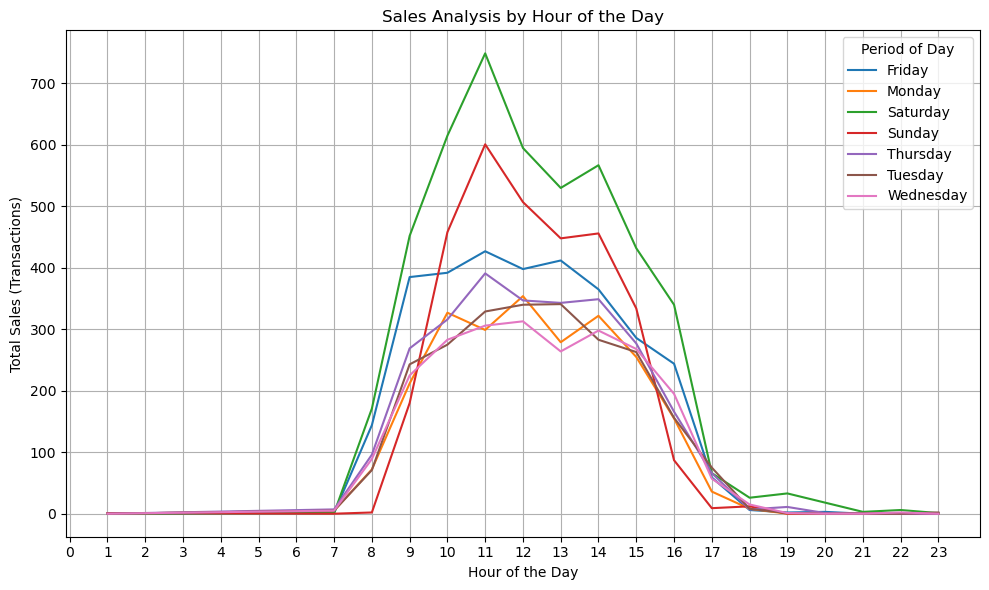

In [53]:
# 17
import matplotlib.pyplot as plt

# Extract hour from the date_time column
df['hour'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.hour

# Aggregate sales by hour and period of the day
sales_by_hour = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

# Plotting the sales analysis
plt.figure(figsize=(10, 6))

# Plot for each period of the day
for period in sales_by_hour.index:
    plt.plot(sales_by_hour.columns, sales_by_hour.loc[period], label=period)

plt.title("Sales Analysis by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales (Transactions)")
plt.xticks(range(0, 24))  # Display all 24 hours
plt.legend(title="Period of Day")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

18. The daily sales trend plot reveals that most people buy breads starting from 7 or 8 and it keeps rising until 11-12 because they want to eat them as breakfast

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

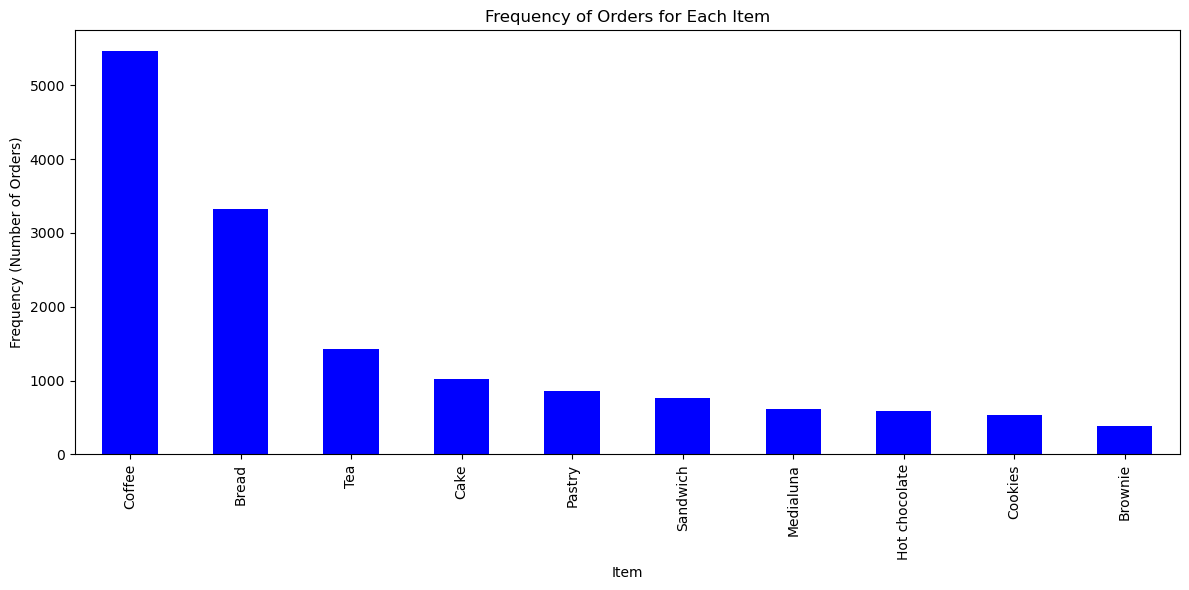

In [58]:
# 19
# Count the frequency of orders for each item
item_frequency = df['Item'].value_counts()

# Display the results
items = item_frequency.head(10)

# Optional: Plot the results for better visualization
plt.figure(figsize=(12, 6))
items.plot(kind='bar', color='blue')
plt.title('Frequency of Orders for Each Item')
plt.xlabel('Item')
plt.ylabel('Frequency (Number of Orders)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

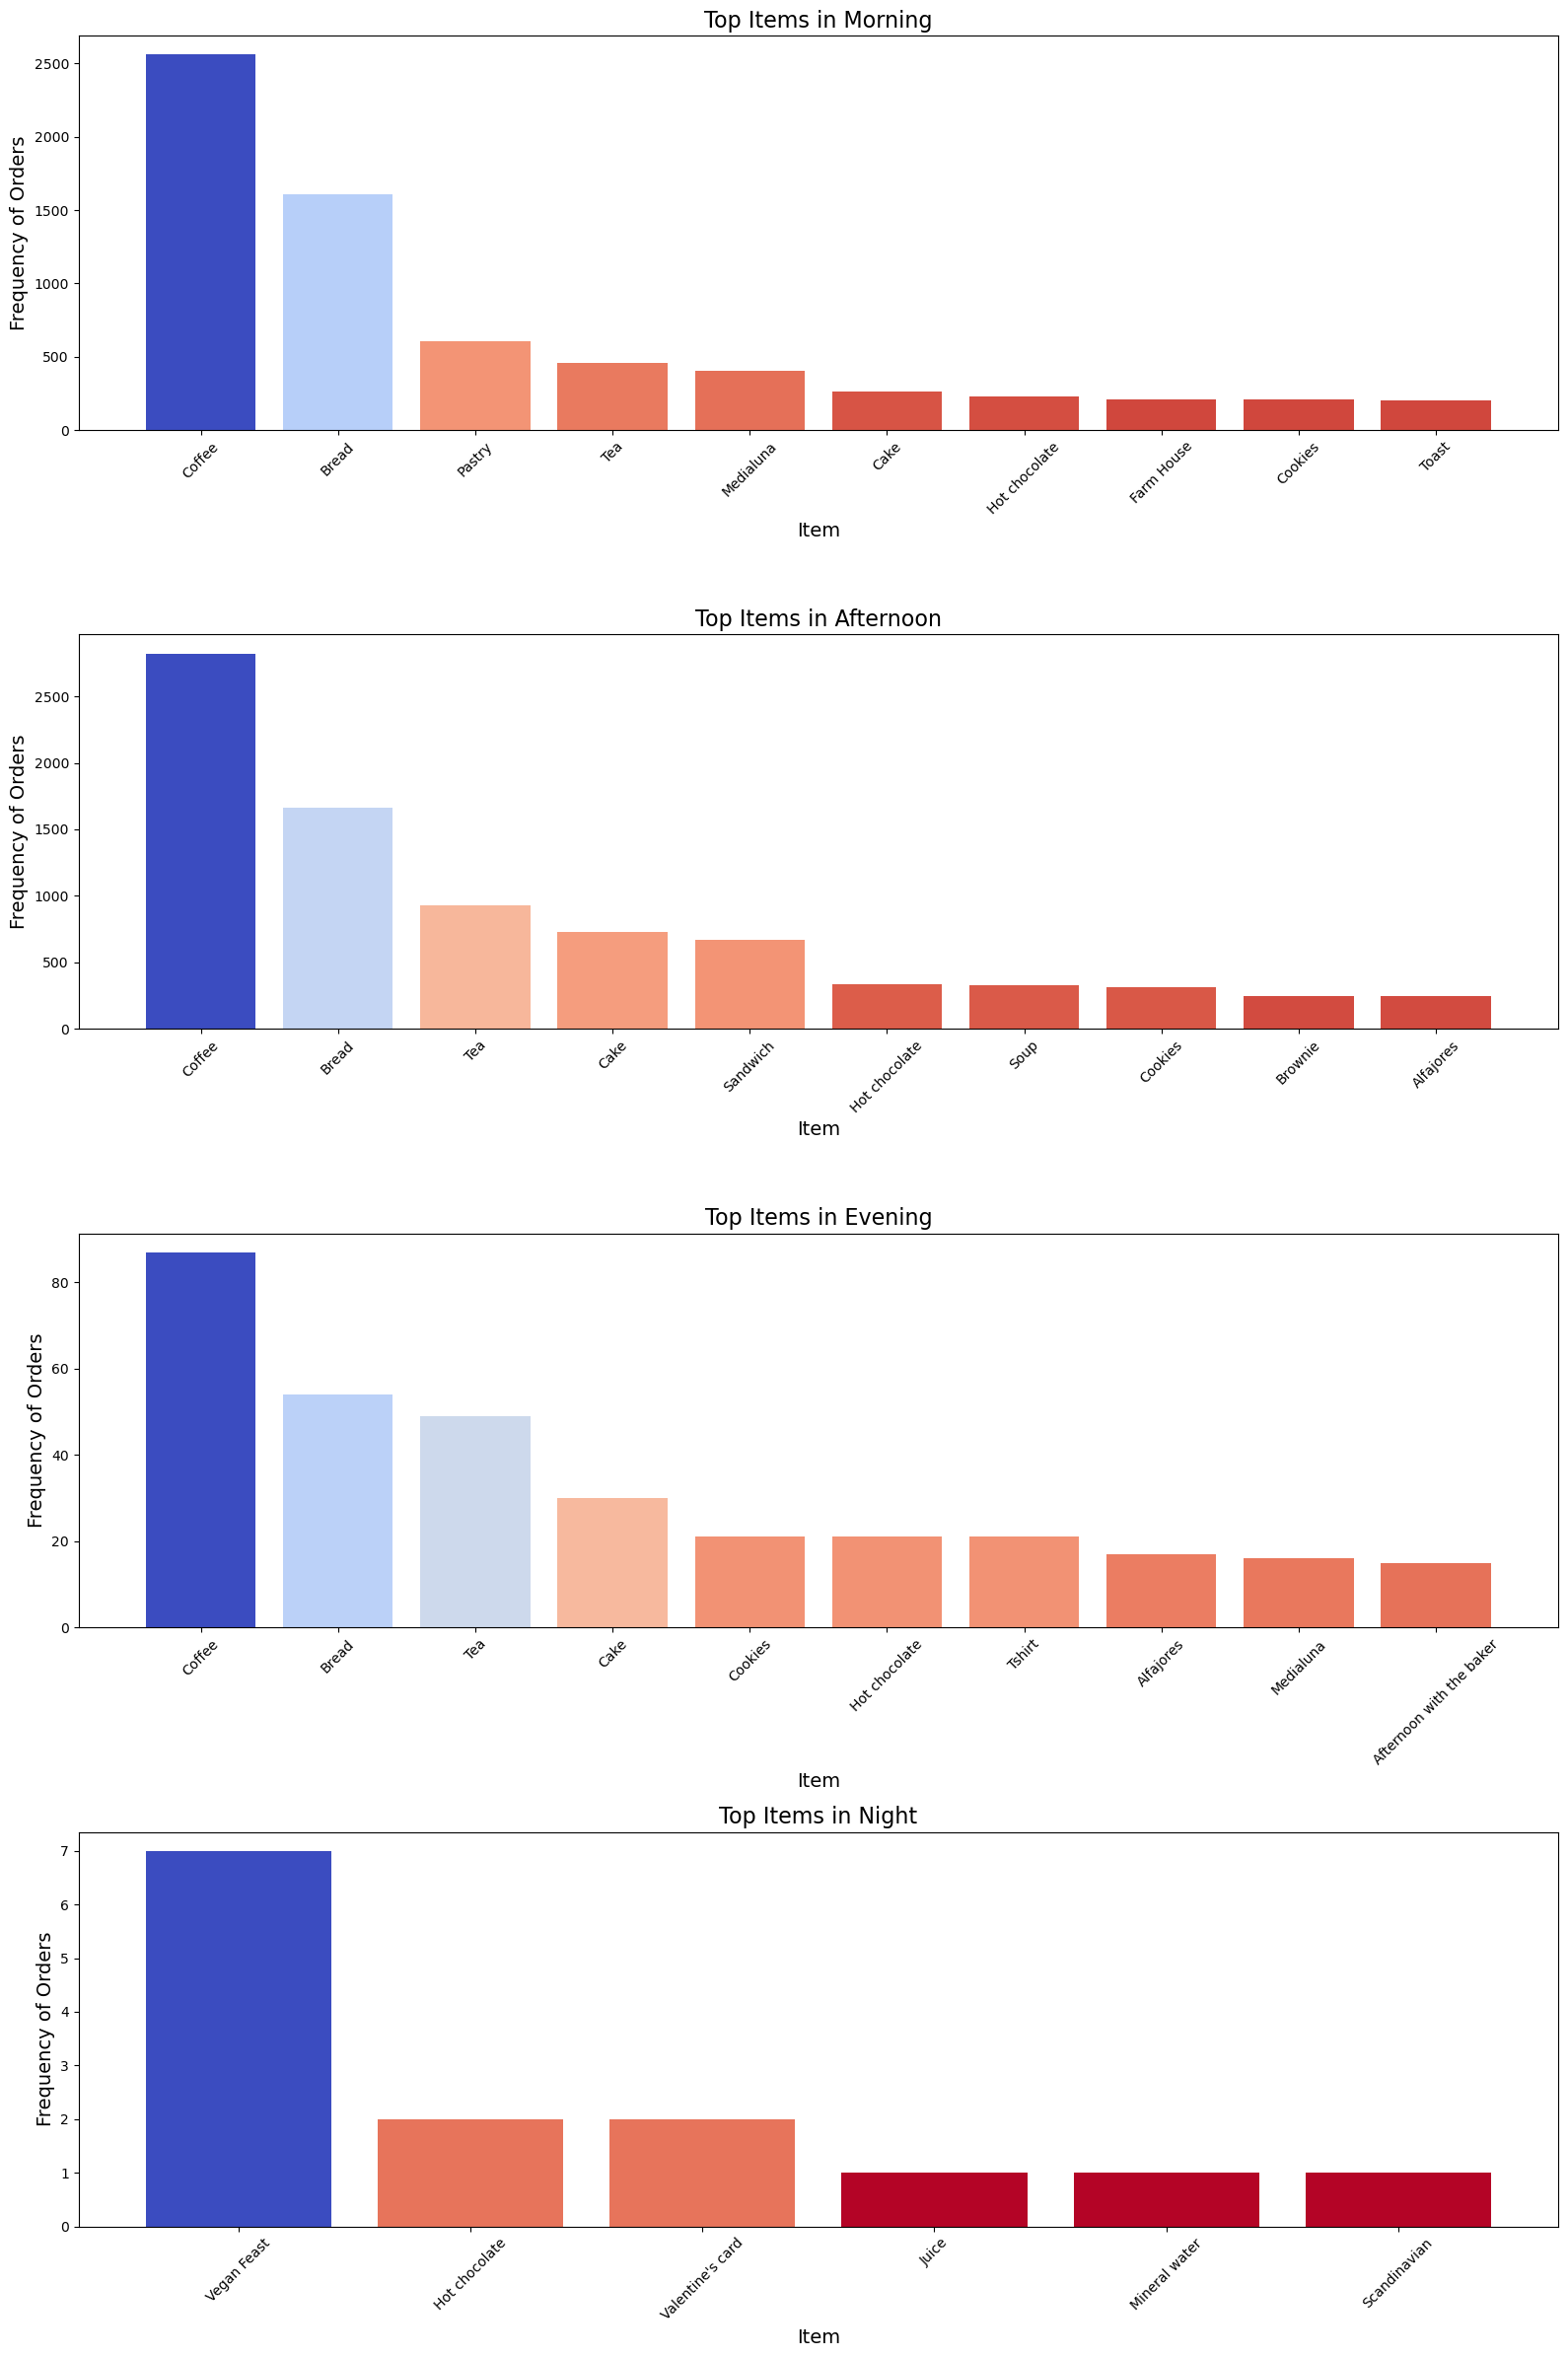

In [72]:
# 20
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Grouping by 'period_day' and 'Item' to count the number of transactions for each item in each period
period_item_sales = df.groupby(['period_day', 'Item'])['Transaction'].count().reset_index()

# Sort the items by frequency within each period_day
period_item_sales_sorted = period_item_sales.sort_values(['period_day', 'Transaction'], ascending=[True, False])

# Create a figure with 4 subplots (one for each period)
fig, axes = plt.subplots(4, 1, figsize=(16, 24))  # 2 rows, 2 columns for 4 periods

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each period
for idx, period in enumerate(df['period_day'].unique()):
    period_data = period_item_sales_sorted[period_item_sales_sorted['period_day'] == period]
    
    # Normalize the frequency values to map to the color map
    norm = plt.Normalize(vmin=period_data['Transaction'].min(), vmax=period_data['Transaction'].max())
    colors = cm.coolwarm_r(norm(period_data['Transaction']))  
    
    # Plotting vertical bars with the color gradient
    axes[idx].bar(period_data['Item'].head(10), period_data['Transaction'].head(10), color=colors)
    axes[idx].set_title(f'Top Items in {period.capitalize()}', fontsize=16)
    axes[idx].set_xlabel('Item', fontsize=14)
    axes[idx].set_ylabel('Frequency of Orders', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


I found a valentine card, I was curious about when people bought it so I made a visualization of it

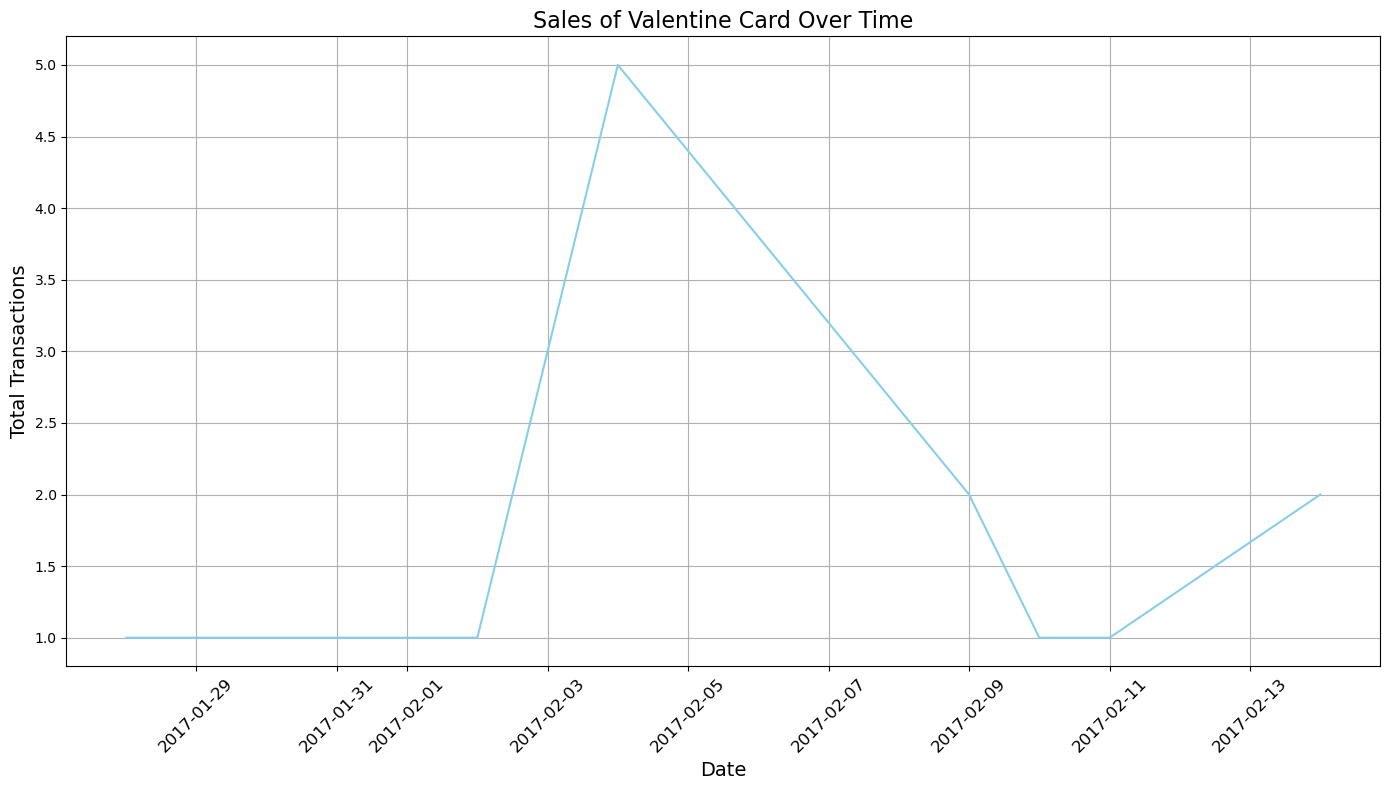

In [75]:
#22
# Filter the dataframe for Valentine Card
valentine_sales = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentine_sales_date = valentine_sales.groupby(valentine_sales['date_time'].dt.date)['Transaction'].count().reset_index()

# Plotting the sales over time (by date)
plt.figure(figsize=(14, 8))
plt.plot(valentine_sales_date['date_time'], valentine_sales_date['Transaction'], color='skyblue')

# Add title and labels
plt.title('Sales of Valentine Card Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Transactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

23. I found the insight from the sale of the Valentine's cards above is people bought the cards the most on february when valentine day is the closest


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [78]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming your dataset is in a DataFrame called `df`
# Step 1: Group by Transaction ID
grouped = df.groupby('Transaction')['Item'].apply(list)

# Step 2: Convert to one-hot encoding
# Convert to a list of lists for the TransactionEncoder
transactions = grouped.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded array
apriori_df = pd.DataFrame(te_array, columns=te.columns_)

# Change False to 0
apriori_df = apriori_df.astype(int)

# Display the transformed DataFrame
apriori_df.head(5)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#25
df['Item'] = df['Item'].astype(str)  # Ensure items are strings
transaction_item_matrix = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)

# Convert quantities to 1 and 0
binary_matrix = (transaction_item_matrix > 0).astype(int)

# Display the binary matrix
binary_matrix.head(5)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [84]:
# 26
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming your dataset is in a DataFrame called `df`
# Step 1: Group by Transaction ID
grouped = df.groupby('Transaction')['Item'].apply(list)

# Step 2: Convert to one-hot encoding
# Convert to a list of lists for the TransactionEncoder
transactions = grouped.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded array
apriori_df = pd.DataFrame(te_array, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(apriori_df, min_support=0.02, use_colnames=True)

# Generate association rules based on "lift" as the metric and a minimum threshold of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [83]:
# 27
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:
The analysis of The Bread Basket dataset revealed several key insights into customer purchase behavior. Sales were notably higher during weekends, with Saturday and Sunday seeing the most transactions. Weekdays, particularly Monday to Friday, showed more consistent but lower sales compared to weekends. Furthermore, transactions were more frequent in the morning and afternoon, with the evening and night periods showing a significant drop in activity. Popular items such as "Scandinavian" and "Bread" were consistently bought across different times of the day and days of the week. The Apriori algorithm also highlighted frequent itemsets, revealing combinations of products often purchased together, which can inform future marketing strategies.